In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output

In [3]:
data = pd.read_csv('ventes.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
print(data.shape)
data.columns

(1000, 17)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df = data.drop('Invoice ID', axis = 1)

In [8]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
listDesVilles=df['City'].value_counts()
print(listDesVilles)

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64


In [10]:
import numpy as np
# Sélectionnez les colonnes numériques (en excluant la colonne 'Date')
numerical_data = data.select_dtypes(include=[np.number])

# Calculez la corrélation entre les variables
correlation_matrix = numerical_data.corr()

In [11]:
correlation_matrix

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


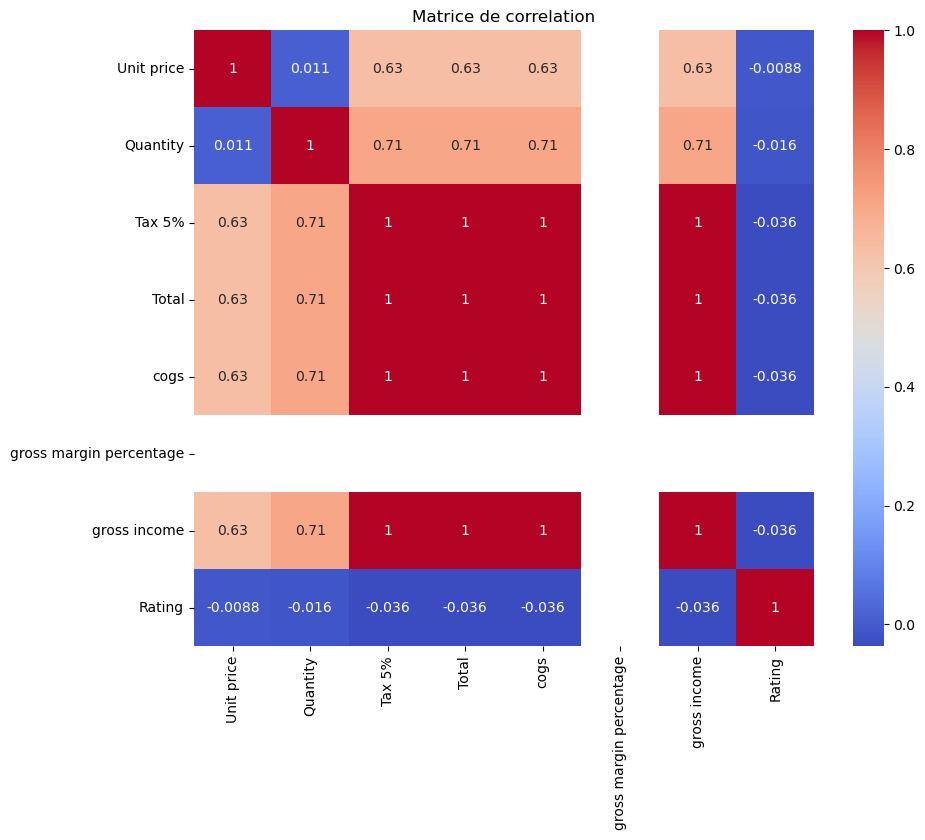

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de correlation')
plt.show()

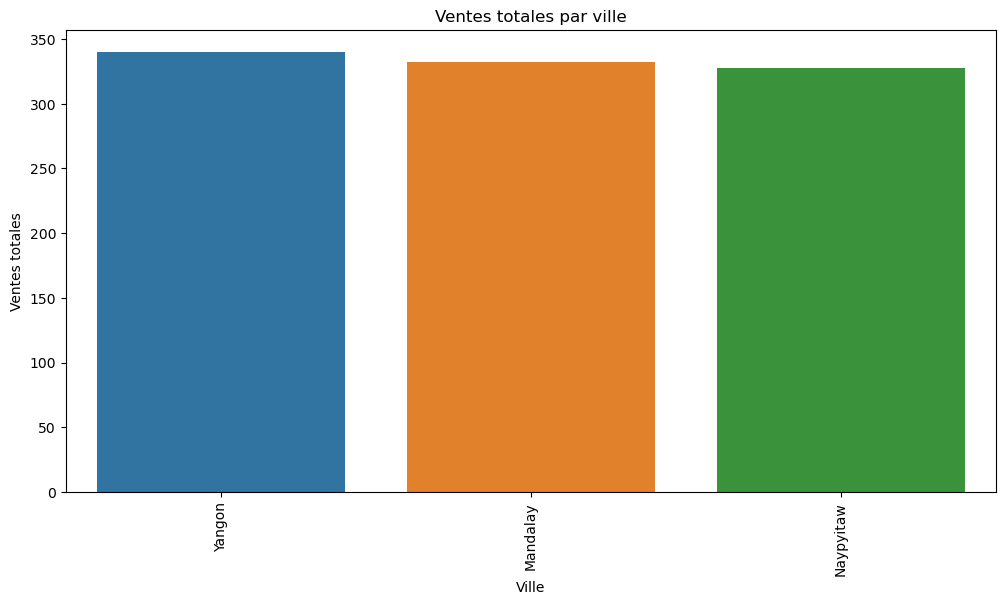

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=listDesVilles.index, y=listDesVilles.values)
plt.title('Ventes totales par ville')
plt.xlabel('Ville')
plt.ylabel('Ventes totales')
plt.xticks(rotation=90)
plt.show()

In [14]:
"""plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='cogs', data=data)
plt.title('Nuage de points : Ventse vs Quantité par ville')
plt.xlabel('Rating')
plt.ylabel('Cogs')
plt.show()"""


"plt.figure(figsize=(10, 6))\nsns.scatterplot(x='Rating', y='cogs', data=data)\nplt.title('Nuage de points : Ventse vs Quantité par ville')\nplt.xlabel('Rating')\nplt.ylabel('Cogs')\nplt.show()"

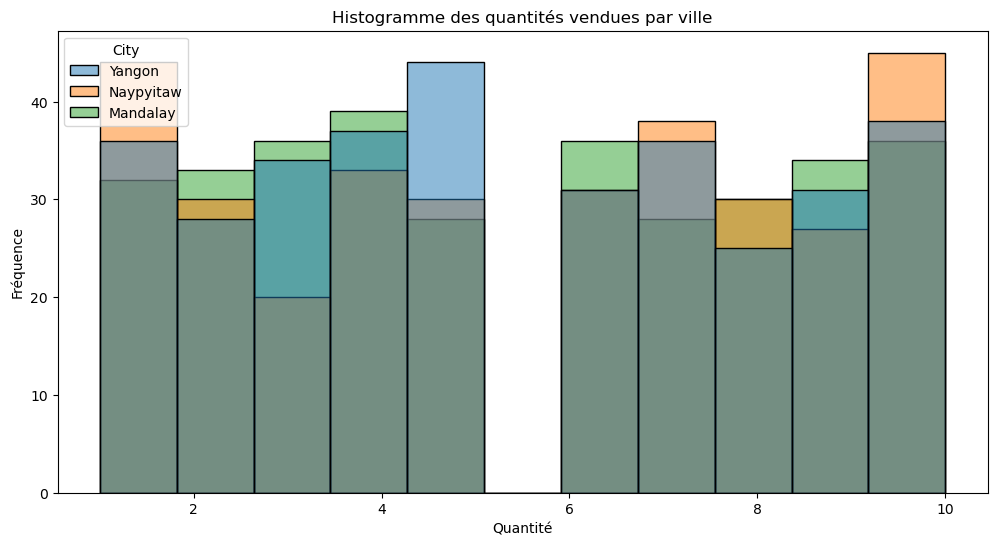

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Quantity', hue='City', kde=False)
plt.title('Histogramme des quantités vendues par ville')
plt.xlabel('Quantité')
plt.ylabel('Fréquence')
#plt.legend(title='Ville')
plt.show()

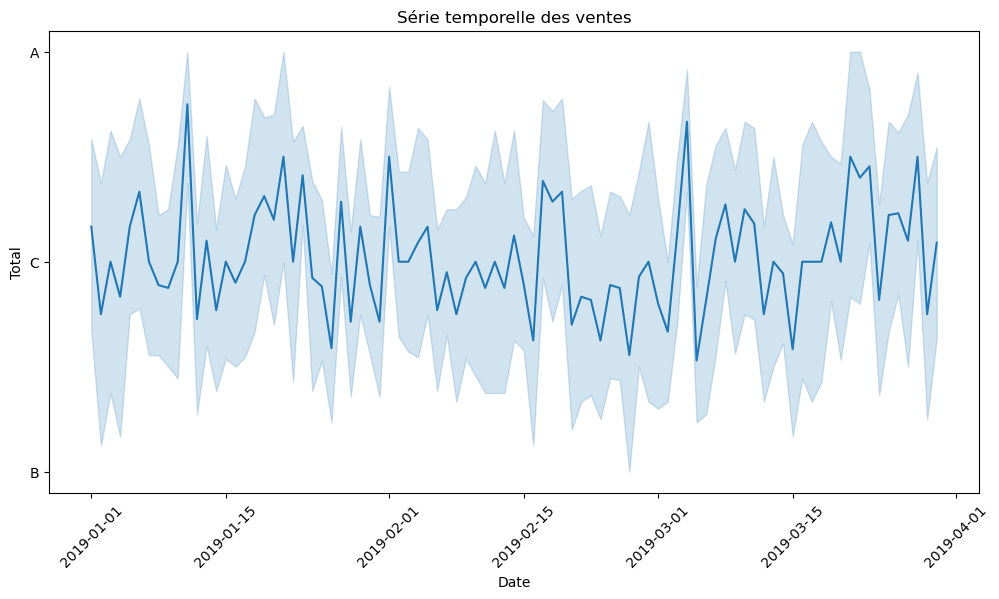

In [16]:
data['Date'] = pd.to_datetime(data['Date'])
# Visualisation de la distribution des ventes au fil du temps
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Date', y='Branch')
plt.title('Série temporelle des ventes')
plt.xlabel('Date')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()
#A inserer une interactivité par ville

In [17]:
 #Extract the day component from the 'date' column and create a new 'day' column
data['day'] = (data['Date']).dt.day

# Extract the month component from the 'date' column and create a new 'month' column
data['month'] = (data['Date']).dt.month

# Extract the year component from the 'date' column and create a new 'year' column
data['year'] = (data['Date']).dt.year

In [18]:
#Regroupez le DataFrame par la colonne « Branche » et comptez les occurrences de chaque type de client dans la colonne « Total »
df.groupby(['Branch']).agg({'Total': 'count'})

,Total
Branch,
A,340
B,332
C,328


<function matplotlib.pyplot.show(close=None, block=None)>

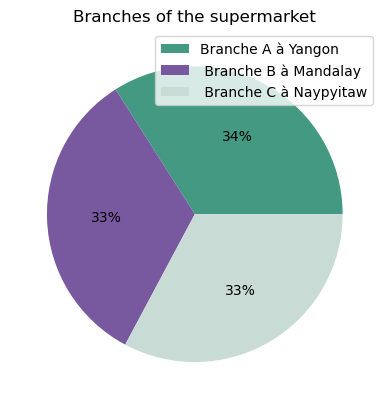

In [19]:
# Définissez les données de branche sous forme de liste avec des décomptes pour chaque branche
branch = [340, 332, 328]

# Définir le rayon du diagramme circulaire
radius = 1.0

# Définir les couleurs pour chaque branche
colors = ["#439981", "#78589f", "#c8dbd5"]

# Afficher les valeurs en pourcentage sur le graphique à secteurs
autopct = "%1.0f%%"
# Créer le diagramme circulaire
plt.pie(branch, radius=radius, colors=colors, autopct=autopct)

# Définir le titre du graphique
plt.title("Branches of the supermarket")

# Ajoutez une légende pour étiqueter chaque branche
plt.legend(labels=["Branche A à Yangon", " Branche B à Mandalay", " Branche C à Naypyitaw"])
plt.show
#Information à vérifier la cohérance

In [20]:
data.groupby(['Gender']).agg({'Total':'count'})

,Total
Gender,
Female,501
Male,499


C:\Users\IMINFO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


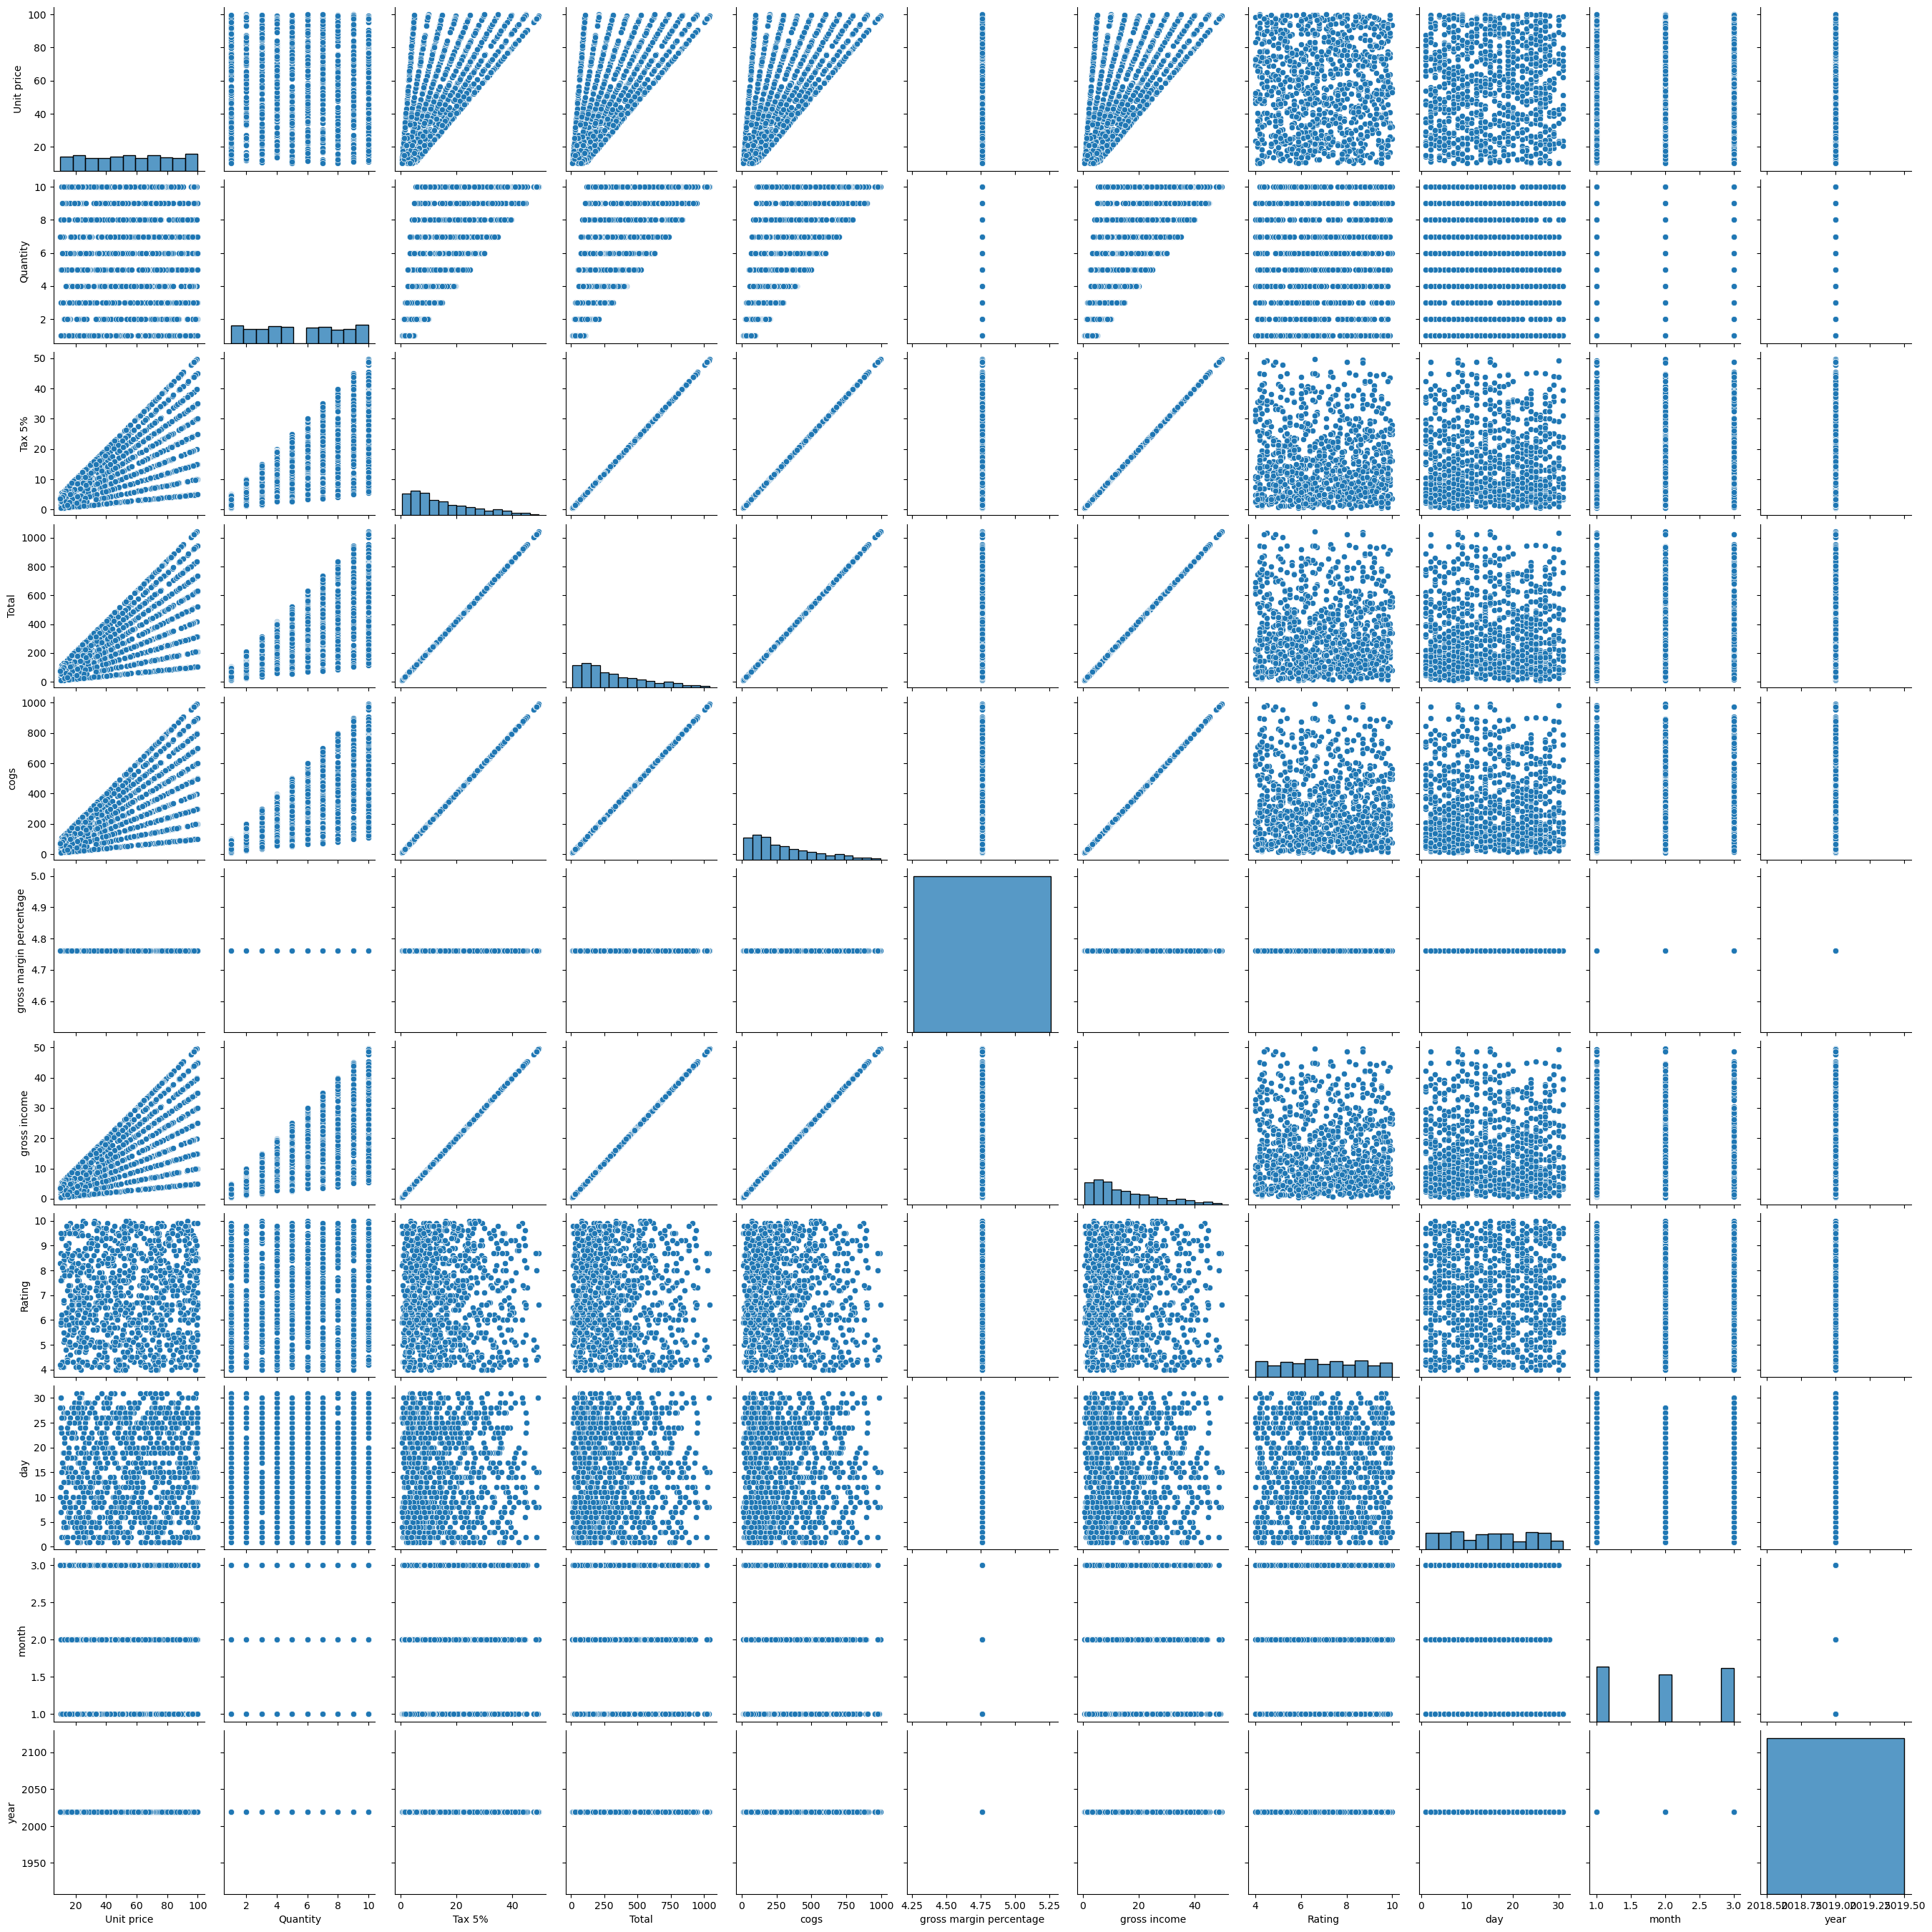

In [21]:
sns.pairplot(data)
plt.show()

C:\Users\IMINFO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


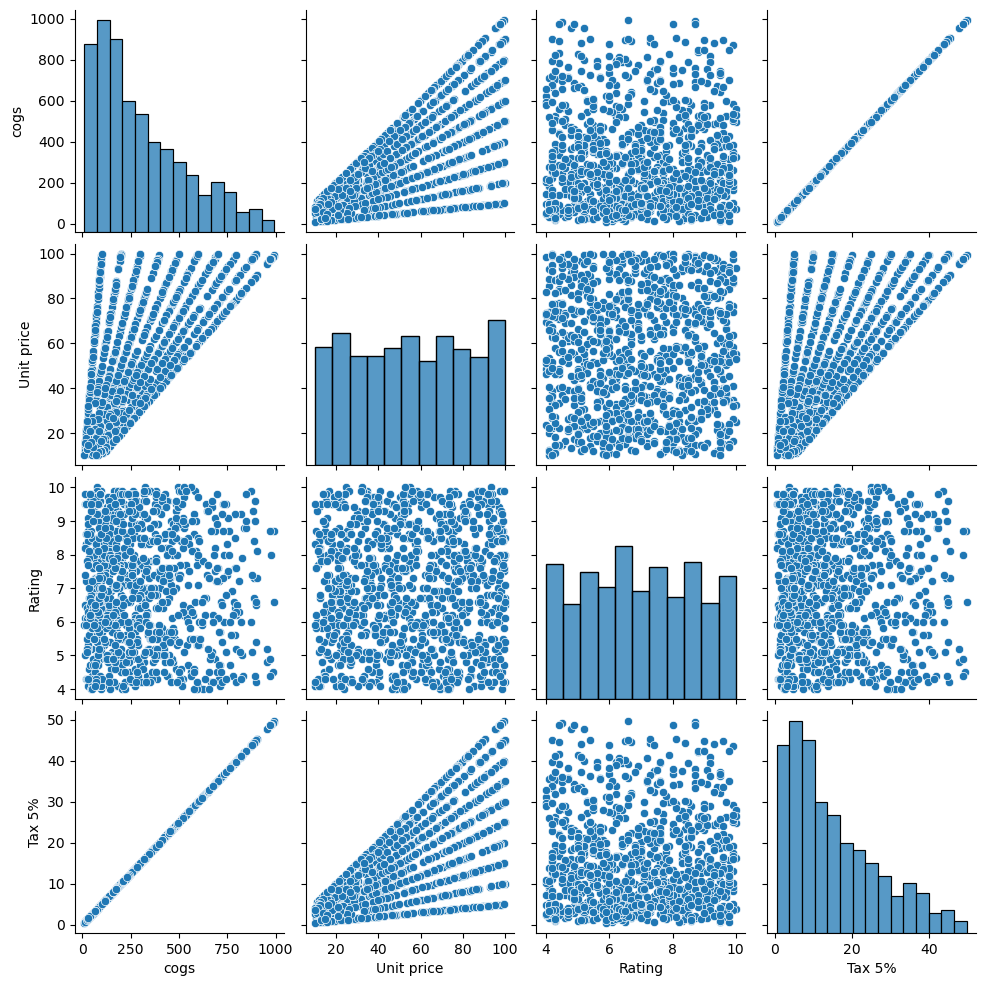

In [30]:
select_colonne = data[['cogs','Unit price','Rating','Tax 5%']]
sns.pairplot(select_colonne)
plt.show()